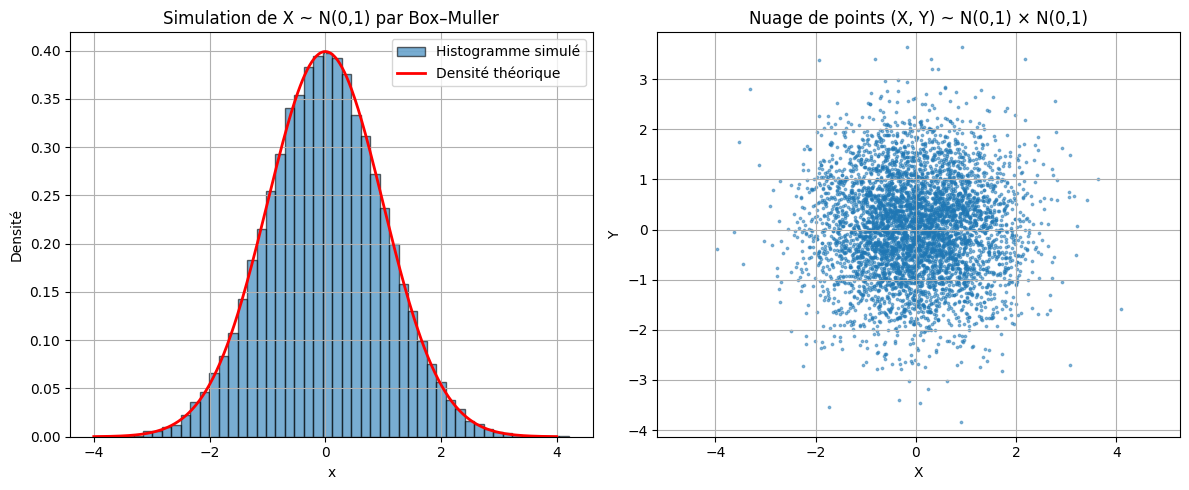

===== Résultats numériques =====
Moyenne empirique de X : -0.00034 (théorique : 0)
Écart-type empirique de X : 1.00470 (théorique : 1)
Moyenne empirique de Y : 0.00666 (théorique : 0)
Écart-type empirique de Y : 0.99533 (théorique : 1)


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Paramètres
# -----------------------------
N = 50000  # nombre d'échantillons à générer

# -----------------------------
# Étape 1 : Génération de U1 et U2 ~ U(0,1)
# -----------------------------
U1 = np.array([np.random.random() for _ in range(N)])
U2 = np.array([np.random.random() for _ in range(N)])

# -----------------------------
# Étape 2 : Transformation de Box-Muller
# -----------------------------
R = np.sqrt(-2 * np.log(U1))
Theta = 2 * np.pi * U2

X = R * np.cos(Theta)
Y = R * np.sin(Theta)

# -----------------------------
# Vérification graphique
# -----------------------------
plt.figure(figsize=(12,5))

# Histogramme de X
plt.subplot(1,2,1)
plt.hist(X, bins=50, density=True, alpha=0.6, edgecolor='black', label='Histogramme simulé')

# Densité théorique de N(0,1)
x_vals = np.linspace(-4, 4, 400)
f_theo = (1 / np.sqrt(2*np.pi)) * np.exp(-x_vals**2 / 2)
plt.plot(x_vals, f_theo, 'r', lw=2, label='Densité théorique')

plt.title("Simulation de X ~ N(0,1) par Box–Muller")
plt.xlabel("x")
plt.ylabel("Densité")
plt.legend()
plt.grid(True)

# Vérification visuelle : points (X,Y)
plt.subplot(1,2,2)
plt.scatter(X[:5000], Y[:5000], s=3, alpha=0.5)
plt.title("Nuage de points (X, Y) ~ N(0,1) × N(0,1)")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis("equal")
plt.grid(True)

plt.tight_layout()
plt.show()

# -----------------------------
# Vérification numérique
# -----------------------------
moy_X = np.mean(X)
ecart_X = np.std(X)

moy_Y = np.mean(Y)
ecart_Y = np.std(Y)

print("===== Résultats numériques =====")
print(f"Moyenne empirique de X : {moy_X:.5f} (théorique : 0)")
print(f"Écart-type empirique de X : {ecart_X:.5f} (théorique : 1)")
print(f"Moyenne empirique de Y : {moy_Y:.5f} (théorique : 0)")
print(f"Écart-type empirique de Y : {ecart_Y:.5f} (théorique : 1)")


Somme des probabilités : 1.0 (doit être 1.0)

=== Caractéristiques de X ===
Espérance théorique E[X] = 5.5500
Variance théorique Var[X] = 2.6475
Écart-type théorique σ[X] = 1.6271


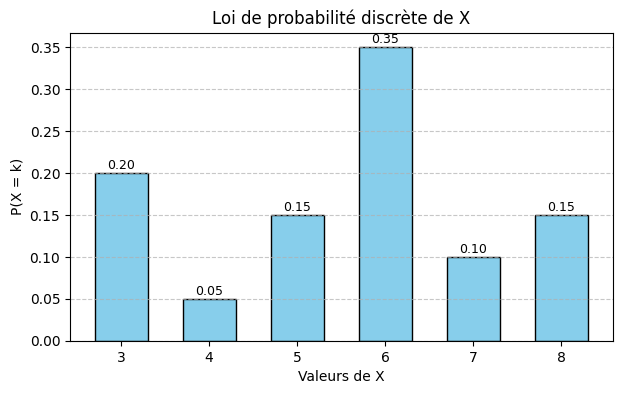

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Définition de la loi
# -----------------------------
k = np.array([3, 4, 5, 6, 7, 8], dtype=float)
p = np.array([4, 1, 3, 7, 2, 3], dtype=float) / 20  # les probabilités associées

# Vérification : somme des probabilités
print(f"Somme des probabilités : {np.sum(p):.1f} (doit être 1.0)")

# -----------------------------
# Calcul de l'espérance et de l'écart-type
# -----------------------------
E = np.sum(k * p)                            # espérance
V = np.sum((k - E)**2 * p)                   # variance
sigma = np.sqrt(V)                           # écart-type

print("\n=== Caractéristiques de X ===")
print(f"Espérance théorique E[X] = {E:.4f}")
print(f"Variance théorique Var[X] = {V:.4f}")
print(f"Écart-type théorique σ[X] = {sigma:.4f}")

# -----------------------------
# Affichage de l’histogramme de la loi
# -----------------------------
plt.figure(figsize=(7,4))
plt.bar(k, p, width=0.6, color='skyblue', edgecolor='black')
plt.title("Loi de probabilité discrète de X")
plt.xlabel("Valeurs de X")
plt.ylabel("P(X = k)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajout des valeurs numériques au-dessus des barres
for i in range(len(k)):
    plt.text(k[i], p[i] + 0.005, f"{p[i]:.2f}", ha='center', fontsize=9)

plt.show()


Somme des probabilités (Z = X1 + X2) : 0.9999999999999999


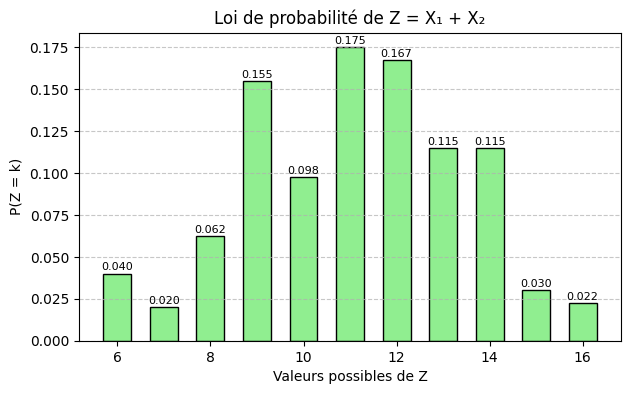

Somme des probabilités (n=10) : 1.0

=== Théorie (somme de n variables) ===
Espérance E[S_n] = 55.5000
Écart-type σ[S_n] = 5.1454


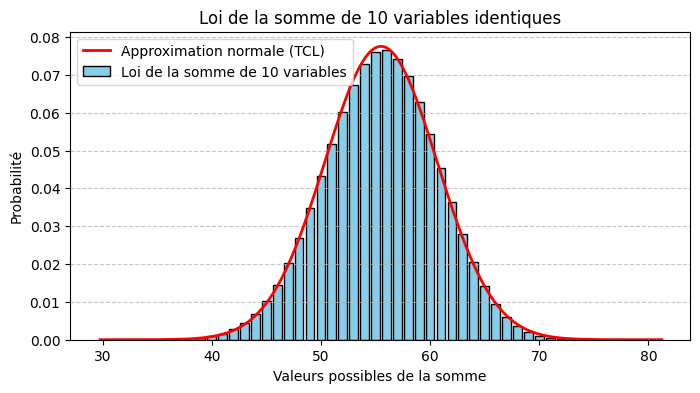

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Loi de X
# -----------------------------
k = np.array([3, 4, 5, 6, 7, 8], dtype=float)
p = np.array([4, 1, 3, 7, 2, 3], dtype=float) / 20

# -----------------------------
# b) Convolution : loi de Z = X1 + X2
# -----------------------------
conv_2 = np.convolve(p, p)
valeurs_Z2 = np.arange(3+3, 8+8+1)  # de 6 à 16

# Vérification
print("Somme des probabilités (Z = X1 + X2) :", np.sum(conv_2))

# -----------------------------
# Affichage de la loi de X1 + X2
# -----------------------------
plt.figure(figsize=(7,4))
plt.bar(valeurs_Z2, conv_2, width=0.6, color='lightgreen', edgecolor='black')
plt.title("Loi de probabilité de Z = X₁ + X₂")
plt.xlabel("Valeurs possibles de Z")
plt.ylabel("P(Z = k)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i in range(len(valeurs_Z2)):
    plt.text(valeurs_Z2[i], conv_2[i] + 0.002, f"{conv_2[i]:.3f}", ha='center', fontsize=8)

plt.show()

# -----------------------------
# c) Loi de la somme de n variables identiques
# -----------------------------
n = 10
p_sum = p.copy()
for i in range(n - 1):
    p_sum = np.convolve(p_sum, p)

valeurs_sum = np.arange(n * 3, n * 8 + 1)
print(f"Somme des probabilités (n={n}) :", np.sum(p_sum))

plt.figure(figsize=(8,4))
plt.bar(valeurs_sum, p_sum, width=0.8, color='skyblue', edgecolor='black', label=f'Loi de la somme de {n} variables')
plt.xlabel("Valeurs possibles de la somme")
plt.ylabel("Probabilité")
plt.title(f"Loi de la somme de {n} variables identiques")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# -----------------------------
# d) Espérance et écart-type théoriques de la somme
# -----------------------------
E_X = np.sum(k * p)
Var_X = np.sum((k - E_X)**2 * p)
E_sum = n * E_X
sigma_sum = np.sqrt(n * Var_X)

print("\n=== Théorie (somme de n variables) ===")
print(f"Espérance E[S_n] = {E_sum:.4f}")
print(f"Écart-type σ[S_n] = {sigma_sum:.4f}")

# -----------------------------
# e) Superposition de la loi normale (TCL)
# -----------------------------
x_norm = np.linspace(E_sum - 5*sigma_sum, E_sum + 5*sigma_sum, 500)
f_norm = 1/(sigma_sum * np.sqrt(2*np.pi)) * np.exp(-0.5*((x_norm - E_sum)/sigma_sum)**2)

# Ajustement : échelle correcte (la loi discrète a une largeur ≈1 entre valeurs)
plt.plot(x_norm, f_norm, 'r-', lw=2, label='Approximation normale (TCL)')
plt.legend()
plt.show()
